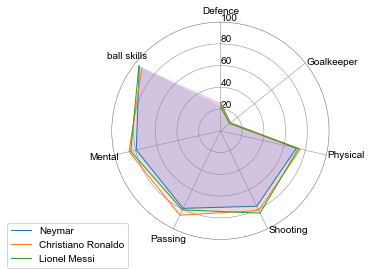

In [2]:
#_*_coding:utf-8 _*_
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
from matplotlib import font_manager
import pandas as pd
from math import pi
font_location = '/Library/Fonts/Arial unicode.ttf'
font_name = font_manager.FontProperties(fname=font_location).get_name()
matplotlib.rc('font', family=font_name)
matplotlib.rcParams['axes.unicode_minus'] = False 
path = './temp/'
football_df = pd.read_csv(path+'/football.csv',encoding="utf8")
Pskill_list = football_df['Primary Skill'].unique()
Group_Statics = football_df.groupby('Primary Skill').mean()

N = len(Group_Statics['Neymar'])
x_as = [n / float(N) * 2 * pi for n in range(N)]
plt.rc('axes', linewidth=0.5, edgecolor="#888888") # Set color of axes
ax = plt.subplot(111, polar=True)  # Create polar plot

# Set clockwise rotation. That is:
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)
ax.set_rlabel_position(0) # Set position of y-labels

# Set color and linestyle of grid
ax.xaxis.grid(True, color="#888888", linestyle='solid', linewidth=0.5)
ax.yaxis.grid(True, color="#888888", linestyle='solid', linewidth=0.5)

plt.xticks(x_as[:-1], []) # Set number of radial axes and remove labels
plt.yticks([20, 40, 60, 80, 100], ["20", "40", "60", "80", "100"]) # Set yticks

# Plot data
ax.plot(x_as, Group_Statics['Neymar'], linewidth=1, linestyle='solid', label='Neymar')
ax.fill(x_as, Group_Statics['Neymar'], 'b', alpha=0.1)
ax.plot(x_as, Group_Statics['Christiano Ronaldo'], linewidth=1, linestyle='solid',label='Christiano Ronaldo')
ax.fill(x_as, Group_Statics['Christiano Ronaldo'], 'r', alpha=0.1)
ax.plot(x_as, Group_Statics['Lionel Messi'], linewidth=1, linestyle='solid',label='Lionel Messi')
ax.fill(x_as, Group_Statics['Lionel Messi'], 'o', alpha=0.1)


# Set axes limits
plt.ylim(0, 100)
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))
# Draw ytick labels to make sure they fit properly
for i in range(N):
    angle_rad = (i / float(N) * 2 * pi)* (-1)
    if angle_rad == 0:
        ha, distance_ax = "center", 10
    elif 0 < angle_rad < -pi:
        ha, distance_ax = "right", 1
    elif angle_rad == pi:
        ha, distance_ax = "center", 1
    elif angle_rad < -pi:
        ha, distance_ax = "left", 1
    ax.text(angle_rad, 100 + distance_ax, Pskill_list[i], size=10, horizontalalignment=ha, verticalalignment="center")

# Show polar plot
plt.show()